# Car Price Prediction with Machine Learning 

#### Task:- 

- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading and Exploring the Dataset

In [3]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include=object)

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [11]:
df.sample(9)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
103,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
80,corolla altis,2016,14.73,14.89,23000,Diesel,Dealer,Manual,0
227,i10,2011,2.55,4.43,57000,Petrol,Dealer,Manual,0
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
249,i20,2016,5.25,7.60,17000,Petrol,Dealer,Manual,0
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
200,Bajaj Pulsar 150,2006,0.10,0.75,92233,Petrol,Individual,Manual,0


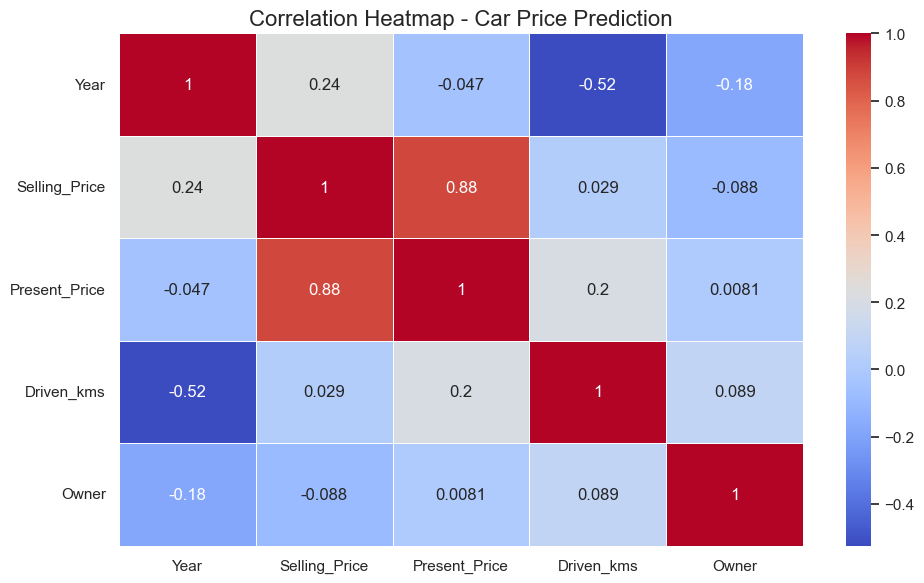

In [12]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()

color_palette = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=color_palette, linewidths=.5)
plt.title('Correlation Heatmap - Car Price Prediction', fontsize=16)
plt.tight_layout()
plt.show()

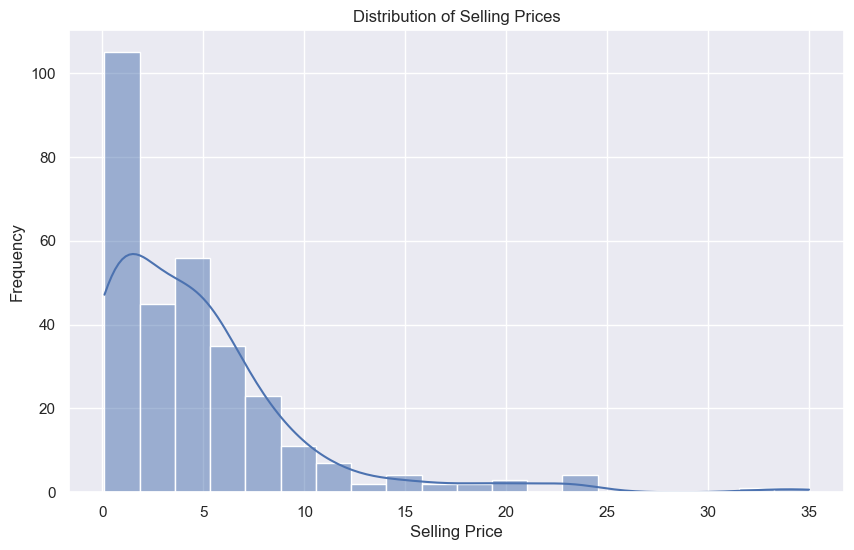

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### Outliers Detection

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
((df < lower_limit) | (df > upper_limit)).sum()

Car_Name          0
Driven_kms        8
Fuel_Type         0
Owner            11
Present_Price    14
Selling_Price    17
Selling_type      0
Transmission      0
Year              7
dtype: int64

In [15]:
def outlier_detect(df):
    for column in df.describe().columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                              df[column].median(), df[column])

    return df

df_no_outliers = outlier_detect(df)

In [16]:
df_no_outliers

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0.0
1,sx4,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0.0
2,ciaz,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0.0
3,wagon r,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0.0
4,swift,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0.0
...,...,...,...,...,...,...,...,...,...
296,city,2016.0,9.50,11.60,33988.0,Diesel,Dealer,Manual,0.0
297,brio,2015.0,4.00,5.90,60000.0,Petrol,Dealer,Manual,0.0
298,city,2009.0,3.35,11.00,87934.0,Petrol,Dealer,Manual,0.0
299,city,2017.0,11.50,12.50,9000.0,Diesel,Dealer,Manual,0.0


### Data Preprocessing

In [17]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df.sample(6)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
48,ertiga,2015.0,5.80,7.71,25870.0,2,0,1,0.0
149,Bajaj Pulsar 220 F,2016.0,0.51,0.94,24000.0,2,1,1,0.0
177,Honda Activa 125,2016.0,0.35,0.57,24000.0,2,1,0,0.0
200,Bajaj Pulsar 150,2006.0,0.10,0.75,92233.0,2,1,1,0.0
287,amaze,2015.0,5.75,7.50,44000.0,2,0,0,0.0
66,innova,2017.0,3.60,6.40,11000.0,2,0,0,0.0


In [18]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [19]:
# Split the Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression model

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
len(x_train), len(y_train)

(240, 240)

In [22]:
len(x_test), len(y_test)

(61, 61)

In [23]:
print('Accuracy of the model: ')
model.score(x_test, y_test)*100

Accuracy of the model: 


66.4498775250142

In [24]:
# Evaluating the model
pred = model.predict(x_test)
mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.9010000163528695


In [25]:
r2 = r2_score(y_test, pred)
print(f'R-squared: {r2*100}')

R-squared: 66.4498775250142


In [26]:
actual_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': pred.flatten()})
actual_predict.head()

,Actual,Predicted
0,0.35,0.570616
1,10.11,7.840508
2,4.95,5.214861
3,0.15,-0.185194
4,6.95,8.773036


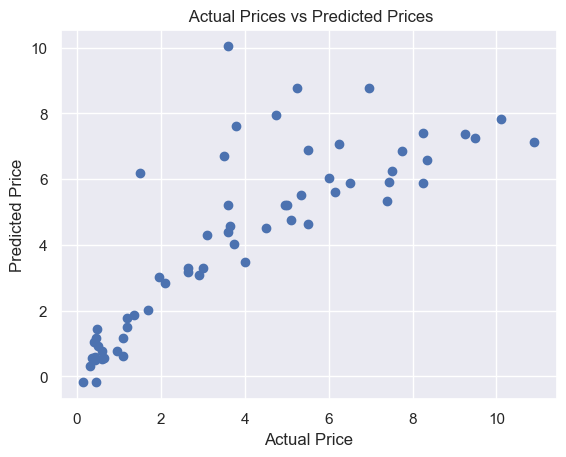

In [27]:
plt.scatter(y_test, pred)
plt.title(" Actual Prices vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()